In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [21]:
# load csvs of data
mouse_csv_path = "./data/Mouse_metadata.csv"
study_csv_path = './data/Study_results.csv'
# preview both
mouse_og_df = pd.read_csv(mouse_csv_path)
mouse_og_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [22]:
study_og_df = pd.read_csv(study_csv_path)
study_og_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [39]:
# merge the two
merged_data = pd.merge(study_og_df, mouse_og_df, how='left', on=["Mouse ID","Mouse ID"])
# check for dups
# dups_check = merged_data['Mouse ID'].duplicated().any()
# print("Dup Check #1:", dups_check)
# merged_data.set_index('Mouse ID')
# merged_data.drop_duplicates('Mouse ID', inplace=True)
# print("Dup Check #2:", dups_check)
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [40]:
# group the data, then get the mean tumor volume for each drup treatment, then convert to df
mean_tumors = pd.DataFrame(merged_data.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"])
mean_tumors.reset_index(inplace=True) 
mean_tumors 

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [41]:
# do the same to for the Standard Error Mean with sem method
sem_tumors = pd.DataFrame(merged_data.groupby(["Drug Regimen", "Timepoint"]).sem()["Tumor Volume (mm3)"])
sem_tumors.reset_index(inplace=True)
sem_tumors.set_index('Timepoint')

sem_tumors

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [42]:
# reformat the dfs for plotting by timepoint
mean_tumors_formatted = mean_tumors.pivot(index='Timepoint', columns='Drug Regimen')["Tumor Volume (mm3)"]
sem_tumors_formatted = sem_tumors.pivot(index='Timepoint', columns='Drug Regimen')["Tumor Volume (mm3)"]



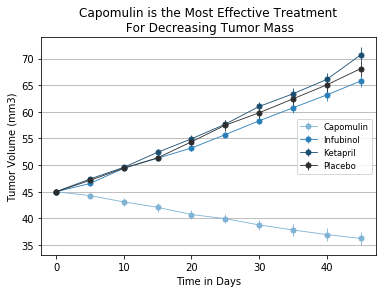

In [68]:
# make a plot for Capomulin
plt.errorbar(
    mean_tumors_formatted.index, 
    mean_tumors_formatted["Capomulin"], 
    yerr=sem_tumors_formatted["Capomulin"], 
    color="#7FB3D5", 
    marker="o", 
    markersize=5, 
    # linestyle="dashed", 
    linewidth=0.85)
# Infubinol plot
plt.errorbar(
    mean_tumors_formatted.index, 
    mean_tumors_formatted["Infubinol"], 
    yerr=sem_tumors_formatted["Infubinol"], 
    color="#2980B9", 
    marker="o", 
    markersize=5, 
    # linestyle="dashed", 
    linewidth=0.85)
# Ketapril plot
plt.errorbar(
    mean_tumors_formatted.index, 
    mean_tumors_formatted["Ketapril"], 
    yerr=sem_tumors_formatted["Ketapril"], 
    color="#1B4F72", 
    marker="o", 
    markersize=5, 
    # linestyle="dashed", 
    linewidth=0.85)
# Placebo plot
plt.errorbar(
    mean_tumors_formatted.index, 
    mean_tumors_formatted["Placebo"], 
    yerr=sem_tumors_formatted["Placebo"], 
    color="#2d2d2d", 
    marker="o", 
    markersize=5, 
    # linestyle="dashed", 
    linewidth=0.85)
# Titles and legends
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time in Days")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="center right", fontsize="small", fancybox=True)
plt.title("Capomulin is the Most Effective Treatment\n For Decreasing Tumor Mass")
plt.savefig('./images/tumorMass.png')
plt.show()